Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

To Load the dataset in Python environment

In [2]:
data=pd.read_csv('/content/mobile_price_classification (1).csv')

In [3]:
data.head(20)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
data.shape

(2000, 21)

To view the information of dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

To check for null values in the dataset

In [ ]:
data.isna().sum()

Statistical observation of dataset

In [ ]:
data.hist(figsize=(20,10),bins=50);

In [6]:
#Datapreparation Step

In [7]:
x=data.iloc[:,0:20]
y=data.iloc[:,20]

In [8]:
#Onehot Encoding of Y_Labels (Target Outputs)

In [9]:
y=pd.get_dummies(y)


Spliting the dataset as training and testing

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [ ]:
#Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [15]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [16]:
y.shape[1]

4

In [17]:
#Initialising the ANN
#Adding Dense Layers

In [18]:
model=Sequential()
model.add(Dense(20,  activation = 'relu', input_dim=20))
model.add(Dropout(0.1))
model.add(Dense( 15,activation = 'sigmoid'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [19]:
history = model.fit(x_train, y_train, epochs= 80, batch_size=50)

Epoch 1/80
20/20 [==============================] - 2s 3ms/step - loss: 1.4410 - accuracy: 0.2480
Epoch 2/80
20/20 [==============================] - 0s 4ms/step - loss: 1.4173 - accuracy: 0.2480
Epoch 3/80
20/20 [==============================] - 0s 4ms/step - loss: 1.4000 - accuracy: 0.2480
Epoch 4/80
20/20 [==============================] - 0s 4ms/step - loss: 1.3879 - accuracy: 0.2520
Epoch 5/80
20/20 [==============================] - 0s 3ms/step - loss: 1.3794 - accuracy: 0.2500
Epoch 6/80
20/20 [==============================] - 0s 3ms/step - loss: 1.3700 - accuracy: 0.2570
Epoch 7/80
20/20 [==============================] - 0s 2ms/step - loss: 1.3622 - accuracy: 0.2530
Epoch 8/80
20/20 [==============================] - 0s 2ms/step - loss: 1.3497 - accuracy: 0.3080
Epoch 9/80
20/20 [==============================] - 0s 2ms/step - loss: 1.3323 - accuracy: 0.4430
Epoch 10/80
20/20 [==============================] - 0s 2ms/step - loss: 1.3074 - accuracy: 0.5540
Epoch 11/80
20/20 [

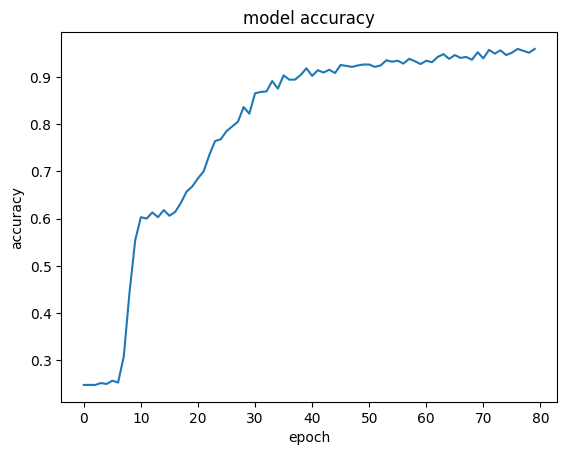

In [20]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [21]:
#hyperparameter tuning

In [45]:
def build_model(rate):
  model=Sequential()
  model.add(Dense(20,  activation = 'relu', input_dim=20))
  model.add(Dropout(0.1))
  model.add(Dense( 15,activation = 'sigmoid'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(5, activation = 'sigmoid'))
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer= 'SGD', loss='categorical_crossentropy', metrics = ['accuracy'])
  return model

In [38]:
seed=7
tf.random.set_seed(seed)

In [24]:
!pip install scikeras

In [39]:
from scikeras.wrappers import KerasClassifier

In [40]:
model=KerasClassifier(model=build_model,verbose=0)

In [46]:

rate=[0.01,0.2,0.4]
epochs=[10,22,50,80,100]
batch_size=[20,50]

In [47]:
param_grid=dict(model__rate=rate,epochs=epochs,batch_size=batch_size)

In [48]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=3)

In [49]:
grid_result=grid.fit(x_train,y_train)

In [50]:
print('Best %f using %s' %(grid_result.best_score_,grid_result.best_params_))

Best 0.907003 using {'batch_size': 20, 'epochs': 80, 'model__rate': 0.4}
